In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/plots/'
plot_name = plot_path + 'c4_logN_v90.png'

mpl.rcParams['legend.numpoints'] = 1




In [2]:
c4 = pd.read_csv('c4_logN_v90.csv')
flags = ['iso', 'low', 'high', 'low_high']

c4

,sol,id,z,min_v,v,max_v,min_n,n,max_n,flag
0,S0927,12,4.34608,19.5252,39.8286,60.1320,12.864500,12.976700,13.210100,iso
1,S0927,14,4.47103,19.4593,39.9900,60.5207,13.226500,13.354900,13.493400,iso
2,S0927,17,4.62376,100.2000,120.1730,140.1460,13.505100,13.672600,13.824800,iso
3,S0927,18,4.69331,60.5159,80.2450,99.9741,13.012200,13.224200,13.393100,iso
4,S0927,24,5.25675,20.1588,39.9248,59.6907,13.338500,13.428600,13.531400,iso
5,S1306,12,4.72314,99.8187,120.1060,140.3940,13.182000,13.389000,13.520800,iso
6,S1306,13,4.74582,59.6671,79.8743,100.0810,12.788300,13.054800,13.224400,iso
7,S1306,16,4.97670,39.8974,59.9568,80.0162,12.970300,13.172700,13.301500,iso
8,S1306,18,5.04281,20.2153,40.0552,59.8950,12.733400,13.454100,13.913200,iso
9,S1306,21,5.80738,56.8621,79.6402,102.4180,12.758400,13.130100,13.418300,iso


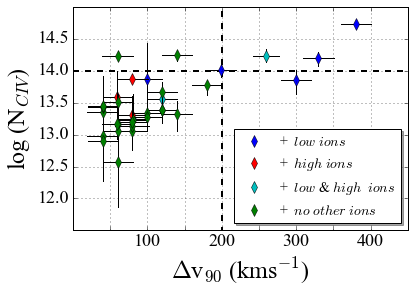

In [13]:

plt.plot([0, 500], [14, 14], 'k--', lw=2)
plt.plot([200, 200], [0, 16], 'k--', lw=2)



f = 1
c4_flag = c4.loc[c4.flag == flags[f]]
plt.plot([c4_flag.v, c4_flag.v], [c4_flag.min_n, c4_flag.max_n], 'k-')
plt.plot([c4_flag.min_v, c4_flag.max_v], [c4_flag.n, c4_flag.n], 'k-')
plt.plot(c4_flag.v, c4_flag.n, 'bd', markersize = 8, label = '+  $low$ $ions$')



f = 2
c4_flag = c4.loc[c4.flag == flags[f]]
plt.plot([c4_flag.v, c4_flag.v], [c4_flag.min_n, c4_flag.max_n], 'k-')
plt.plot([c4_flag.min_v, c4_flag.max_v], [c4_flag.n, c4_flag.n], 'k-')
plt.plot(c4_flag.v, c4_flag.n, 'rd', markersize = 8, label = '+  $high$ $ions$')



f = 3
c4_flag = c4.loc[c4.flag == flags[f]]
plt.plot([c4_flag.v, c4_flag.v], [c4_flag.min_n, c4_flag.max_n], 'k-')
plt.plot([c4_flag.min_v, c4_flag.max_v], [c4_flag.n, c4_flag.n], 'k-')
plt.plot(c4_flag.v, c4_flag.n, 'cd', markersize = 8, label = '+  $low$ & $high$  $ions$')


f = 0
c4_flag = c4.loc[c4.flag == flags[f]]
plt.plot([c4_flag.v, c4_flag.v], [c4_flag.min_n, c4_flag.max_n], 'k-')
plt.plot([c4_flag.min_v, c4_flag.max_v], [c4_flag.n, c4_flag.n], 'k-')
plt.plot(c4_flag.v, c4_flag.n, 'gd', markersize = 8, label = '+  $no$ $other$ $ions$')



# add legend
plt.rc('legend',**{'fontsize':14})
plt.rc('font',family='Times New Roman')
plt.legend( loc=0,  shadow=True)

# x, y labels and title
plt.xlabel('$\Delta$v$_{90}$ (kms$^{-1}$)', **hfont,  fontsize=24)
plt.ylabel('log (N$_{CIV}$)', **hfont,  fontsize=24)
#plt.title(' CIV systems ', **hfont,  fontsize=24)

# x and y ranges
plt.xlim([0, 450])
plt.ylim([11.5, 15] )


# x and y ticks
xlabels = [' ', '100', ' ', '200', ' ', '300', ' ', '400']
plt.xticks([50, 100, 150, 200, 250, 300, 350, 400], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['12.0', '12.5', '13.0', '13.5', '14.0', '14.5', ' ']
plt.yticks([12, 12.5, 13, 13.5, 14, 14.5, 15], 
            ylabels, **hfont, fontsize = 18)

plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)

plt.grid(True)
